In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt 
import seaborn as sns
from IPython.display import set_matplotlib_formats as set_fmt
set_fmt('svg')
pd.set_option('display.precision' , 2)

/var/folders/3k/w7dms1z52c14_f9dcvwscltm0000gn/T/ipykernel_66112/3573489814.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_fmt('svg')


# Data Understanding

In [130]:
df = pd.read_csv('/Users/parisa/Desktop/python/kaggle/UberDataset.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [131]:
df.describe()

,MILES
count,1156.00
mean,21.12
std,359.30
min,0.50
25%,2.90
50%,6.00
75%,10.40
max,12204.70


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Cleaning

In [134]:
# Filling NULL values in feature PURPOSE
df['PURPOSE'] = df['PURPOSE'].fillna('UNKNOWN')

# Remove missing values ---> df.dropna
df.dropna(inplace= True)
df.isnull().sum()

#df.info()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

# Data Preprocessing

In [135]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [138]:
# converting START_DATE and END_DATE into datetime format

df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [139]:
#create new feature representing time of the ride-morning, afternoon, evening, night

df['TIME_DAY'] = df['START_DATE'].apply(lambda i : i.hour)  


df['TIME_OF_DAY'] = df['START_DATE'].apply(lambda i : i.hour)
df['TIME_OF_DAY'] = pd.cut(x=df['TIME_OF_DAY'] , bins=[0, 6, 11, 17, 21, 24] ,
                           labels=['Night', 'Morning','Afternoon','Evening','Night'] , ordered= False)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon


In [69]:
#create new feature representing month of the ride

df['MONTH_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i : i.month)

month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
df['MONTH_OF_THE_RIDE'] = df['MONTH_OF_THE_RIDE'].map(month_label)

df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan


In [140]:
#create new feature representing day (week) of the ride

df['DAY_OF_THE_RIDE'] = df['START_DATE'].apply(lambda i : i.weekday())

day_label = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['DAY_OF_THE_RIDE'] = df['DAY_OF_THE_RIDE'].map(day_label)

df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,DAY_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Wed


In [141]:
# duration of the ride
df['DURATION_OF_THE_RIDE'] = (df['END_DATE'] - df['START_DATE']).astype('timedelta64[m]')

df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Fri,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Sat,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Sat,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Tues,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Wed,67.0


# Data Exploration

In [142]:
df.describe()

,MILES,TIME_DAY,DURATION_OF_THE_RIDE
count,1155.00,1155.00,1155.00
mean,10.57,14.70,23.24
std,21.58,4.58,27.32
min,0.50,0.00,0.00
25%,2.90,12.00,10.00
50%,6.00,15.00,16.00
75%,10.40,18.00,27.50
max,310.30,23.00,336.00


In [143]:
print('Min Timestamp in START_TIME is : %s' %df['START_DATE'].min())
print('Max Timestamp in START_TIME is : %s' % df['START_DATE'].max())

Min Timestamp in START_TIME is : 2016-01-01 21:11:00
Max Timestamp in START_TIME is : 2016-12-31 22:08:00


In [144]:
print("Total number of unique categories in CATEGORY : %s" %df['CATEGORY'].nunique())
print("Total number of unique categories in PURPOSE : %s" %df['PURPOSE'].nunique())
print("Total number of unique location in START : %s" %df['START'].nunique())
print("Total number of unique location in STOP : %s" %df['STOP'].nunique())

Total number of unique categories in CATEGORY : 2
Total number of unique categories in PURPOSE : 11
Total number of unique location in START : 177
Total number of unique location in STOP : 188


# Data Visualization

In [145]:
df['CATEGORY']

0       Business
1       Business
2       Business
3       Business
4       Business
          ...   
1150    Business
1151    Business
1152    Business
1153    Business
1154    Business
Name: CATEGORY, Length: 1155, dtype: object

In [146]:
df['CATEGORY'].astype('category')

0       Business
1       Business
2       Business
3       Business
4       Business
          ...   
1150    Business
1151    Business
1152    Business
1153    Business
1154    Business
Name: CATEGORY, Length: 1155, dtype: category
Categories (2, object): ['Business', 'Personal']

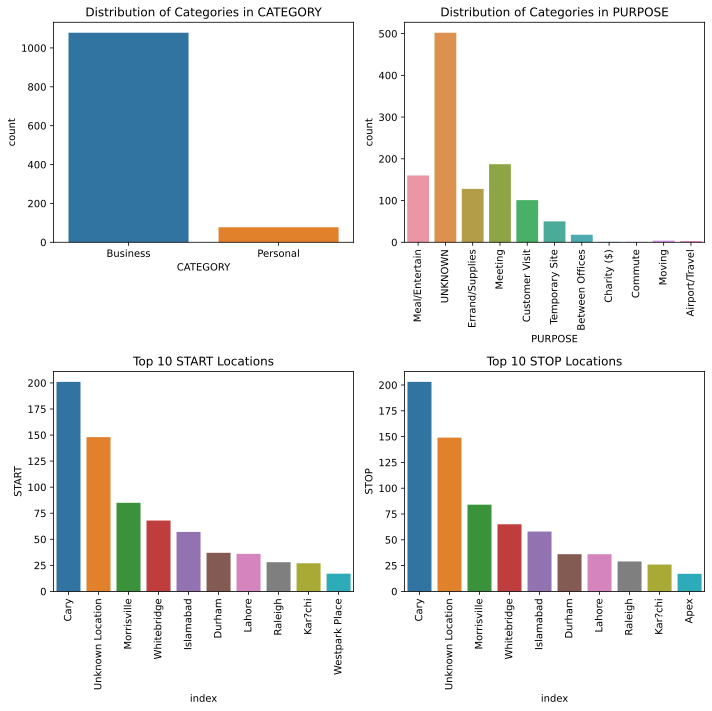

In [105]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))


# Convert 'CATEGORY' column to categorical data type
df['CATEGORY'] = df['CATEGORY'].astype('category')
df.head()

################ Distribution of Categories in CATEGORY################
sns.countplot(data=df , x='CATEGORY' , ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Categories in CATEGORY')


################ Distribution of Categories in PURPOSE
sns.countplot(data=df , x='PURPOSE' , ax=axes[0,1])
axes[0,1].set_title('Distribution of Categories in PURPOSE')
axes[0,1].tick_params(axis='x', rotation=90)


############## Top 10 locations for START #############################
temp = df['START'].value_counts().nlargest(10).reset_index()
sns.barplot(data=temp , x='index' , y='START' , ax=axes[1,0])
axes[1,0].set_title('Top 10 START Locations')
axes[1,0].tick_params(axis='x', rotation=90)


############## Top 10 locations for STOP #############################
temp = df['STOP'].value_counts().nlargest(10).reset_index()
sns.barplot(data=temp , x='index' , y='STOP' , ax=axes[1,1])
axes[1,1].set_title('Top 10 STOP Locations')
axes[1,1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

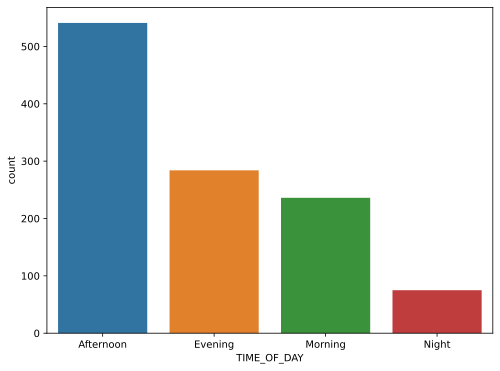

In [118]:
df['TIME_OF_DAY'] = df['TIME_OF_DAY'].astype('category')
plt.figure(figsize=(8,6))
sns.countplot(data=df , x='TIME_OF_DAY')


plt.show()

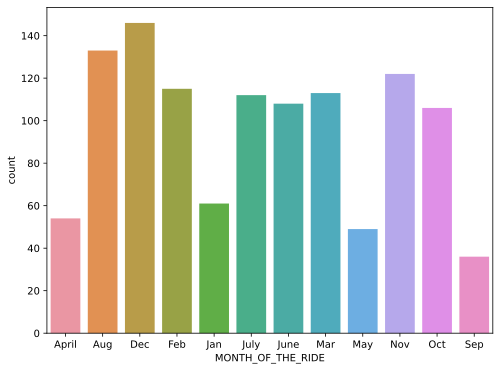

In [119]:
df['MONTH_OF_THE_RIDE'] = df['MONTH_OF_THE_RIDE'].astype('category')
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='MONTH_OF_THE_RIDE')

plt.show()

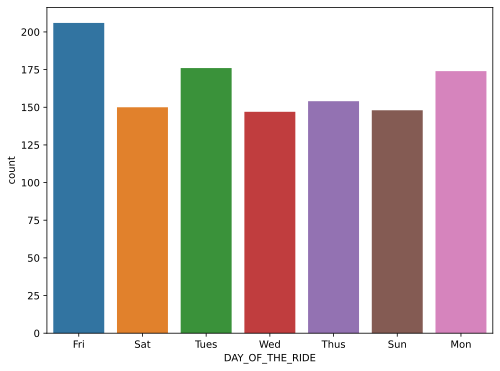

In [122]:
plt.figure(figsize=(8,6))
sns.countplot(data=df , x='DAY_OF_THE_RIDE')
plt.show()

In [123]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_DAY,TIME_OF_DAY,MONTH_OF_THE_RIDE,DAY_OF_THE_RIDE,DURATION_OF_THE_RIDE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,Evening,Jan,Fri,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,UNKNOWN,1,Night,Jan,Sat,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,Evening,Jan,Sat,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,Afternoon,Jan,Tues,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,Afternoon,Jan,Wed,67.0


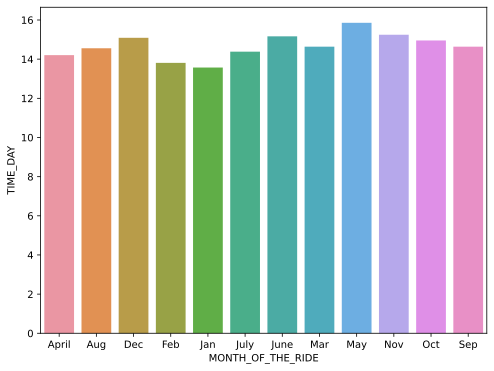

In [127]:
plt.figure(figsize=(8,6))

temp= df.groupby('MONTH_OF_THE_RIDE')['TIME_DAY'].mean().reset_index()
sns.barplot(data=temp , x='MONTH_OF_THE_RIDE' , y='TIME_DAY')
plt.show()
